# Predicting customer churn at a fictitious wireless telecom company

# Importing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
pd.set_option('display.max_columns', None)

In [2]:
df1=pd.read_csv("Churn.csv", na_values=[""," ","NA","N/A",])

# Understanding the data

In [3]:
pd.set_option('display.max_columns', None)
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df1.shape

(7043, 21)

In [5]:
df2=df1.copy()
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory Data Analysis

In [6]:
df2.isnull().mean()*100

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

In [7]:
#There is 0.15% of null data in total charges check outliers if any.

# Feature Engineering 

In [8]:
#categorising numeric and categorical features 

In [9]:
numeric_features = df2.select_dtypes(include=[np.number])
categorical_features = df2.select_dtypes(include=[np.object])

print('Numeric Features:\n', numeric_features.columns)
print('Categorical Features:\n', categorical_features.columns)

Numeric Features:
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
Categorical Features:
 Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [10]:
# Univariate analysis for numeric and catogorical seperatly using histogram and countplots respectively 

In [11]:
## DATA VISUALIZATION

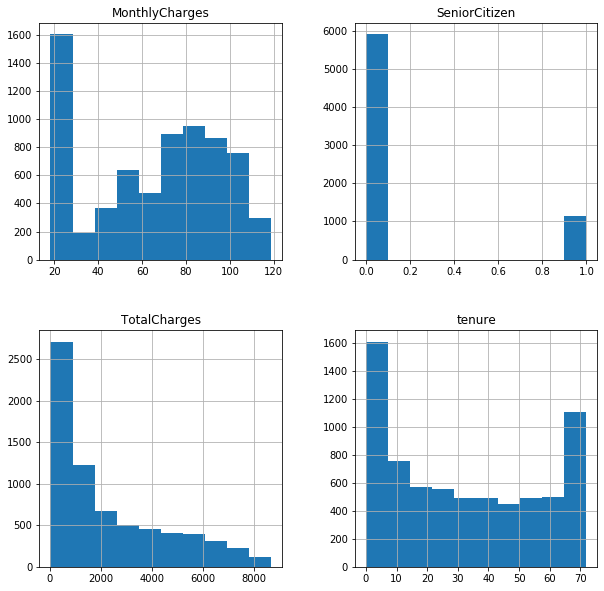

In [12]:
# create a histogram plot of each Numerical variable
ax = df2.hist(figsize=(10,10))
plt.show()

In [13]:
df2.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
df2.select_dtypes(include=[np.number]).isnull().sum()

SeniorCitizen      0
tenure             0
MonthlyCharges     0
TotalCharges      11
dtype: int64

In [15]:
df2.median()

SeniorCitizen        0.000
tenure              29.000
MonthlyCharges      70.350
TotalCharges      1397.475
dtype: float64

In [16]:
df2['TotalCharges'] = df2['TotalCharges'].replace(np.nan, 1397.475)

In [17]:
df2.select_dtypes(include=[np.number]).isnull().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

In [18]:
# we have to deal with outliiers in each numeric variable 
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.000,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.000,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.350,89.85,118.75
TotalCharges,7043.0,2281.916928,2265.270398,18.80,402.225,1397.475,3786.60,8684.80


In [19]:
df3=df2.copy()
# we will do the numerical transformation in df4 , so that if we din get a good accuracy we can always come back and start with df3

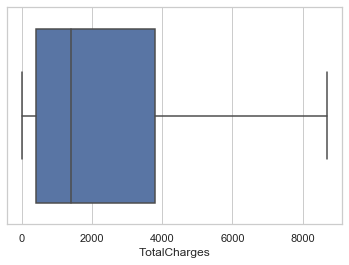

In [20]:
#univariate analysis 
#Total Charges -no nulls, need to check for outlier and do the needfull
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=df3["TotalCharges"])

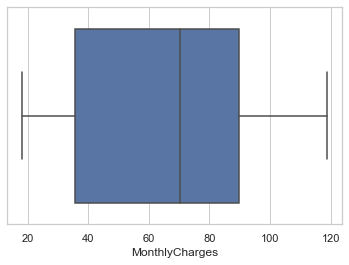

In [21]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df3["MonthlyCharges"])

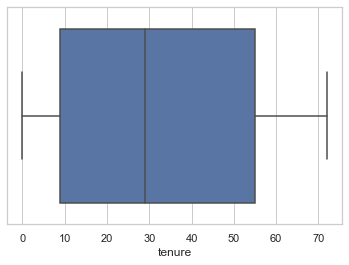

In [22]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df3["tenure"])

In [23]:
#From boxplots there are no visible ouliers in the numerical categories

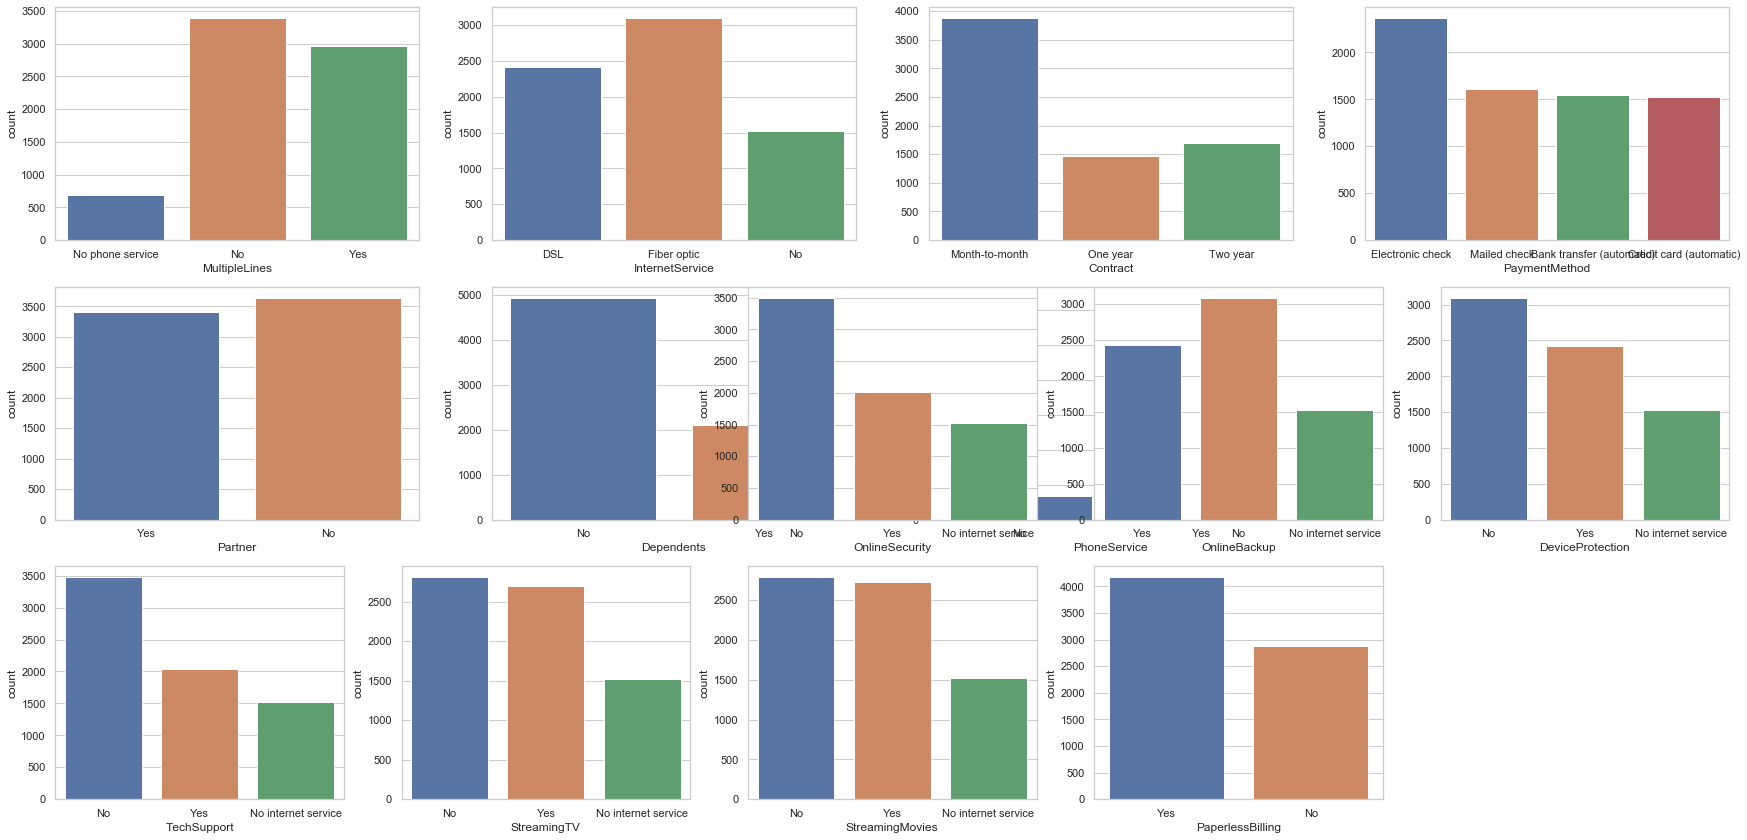

In [24]:
fig = plt.figure(figsize = (30,30))

ax1 = fig.add_subplot(6,4,1)
sns.countplot(data = df3, x = 'MultipleLines', ax=ax1)
ax2 = fig.add_subplot(6,4,2)
sns.countplot(data = df3, x = 'InternetService', ax=ax2)
ax3 = fig.add_subplot(6,4,3)
sns.countplot(data = df3, x = 'Contract', ax=ax3)
ax3 = fig.add_subplot(6,4,4)
sns.countplot(data = df3, x = 'PaymentMethod', ax=ax3)
ax3 = fig.add_subplot(6,4,5)
sns.countplot(data = df3, x = 'Partner', ax=ax3)
ax3 = fig.add_subplot(6,4,6)
sns.countplot(data = df3, x = 'Dependents', ax=ax3)
ax3 = fig.add_subplot(6,4,7)
sns.countplot(data = df3, x = 'PhoneService', ax=ax3)
ax3 = fig.add_subplot(6,5,8)
sns.countplot(data = df3, x = 'OnlineSecurity', ax=ax3)
ax3 = fig.add_subplot(6,5,9)
sns.countplot(data = df3, x = 'OnlineBackup', ax=ax3)
ax3 = fig.add_subplot(6,5,10)
sns.countplot(data = df3, x = 'DeviceProtection', ax=ax3)
ax3 = fig.add_subplot(6,5,11)
sns.countplot(data = df3, x = 'TechSupport', ax=ax3)
ax3 = fig.add_subplot(6,5,12)
sns.countplot(data = df3, x = 'StreamingTV', ax=ax3)
ax3 = fig.add_subplot(6,5,13)
sns.countplot(data = df3, x = 'StreamingMovies', ax=ax3)
ax3 = fig.add_subplot(6,5,14)
sns.countplot(data = df3, x = 'PaperlessBilling', ax=ax3)

In [25]:
# from the countplot of the categorical variable we came to knpw that there is less cardinality.

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
df3.drop("customerID",axis=1,inplace=True)

In [28]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
#cgange target
Target=[]
for x in df3["Churn"]:
    if x=="Yes":
        Target.append(1)
    else:
        Target.append(0)
        
df3["Target"]=Target
        
        
        
 
        
    

In [30]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Target
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [31]:
df4=df3.drop("Churn",axis=1)

In [32]:
#one hot encoding 
df5=pd.get_dummies(df4)

In [33]:
df5.shape

(7043, 46)

In [34]:
df5.head()
data1=df5.copy()

In [35]:

X=data1.drop("Target",axis=1)
y=data1["Target"]

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=400)

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
clf=RandomForestClassifier(n_estimators=80,oob_score=True,n_jobs=-1,random_state=400)

In [39]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
                       oob_score=True, random_state=400, verbose=0,
                       warm_start=False)

In [40]:
clf.oob_score_

0.7836350727724529

In [41]:
for w in range(50,100,10):
    clf=RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=-1,random_state=400)
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')

For n_estimators = 50
OOB score is 0.7795527156549521
************************
For n_estimators = 60
OOB score is 0.7815051473198438
************************
For n_estimators = 70
OOB score is 0.7834575789847356
************************
For n_estimators = 80
OOB score is 0.7836350727724529
************************
For n_estimators = 90
OOB score is 0.7834575789847356
************************


In [42]:
for w in range(100,200,10):
    clf=RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=-1,random_state=400)
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')

For n_estimators = 100
OOB score is 0.7829250976215832
************************
For n_estimators = 110
OOB score is 0.7829250976215832
************************
For n_estimators = 120
OOB score is 0.7806176783812566
************************
For n_estimators = 130
OOB score is 0.7815051473198438
************************
For n_estimators = 140
OOB score is 0.7820376286829961
************************
For n_estimators = 150
OOB score is 0.7813276535321264
************************
For n_estimators = 160
OOB score is 0.7813276535321264
************************
For n_estimators = 170
OOB score is 0.7795527156549521
************************
For n_estimators = 180
OOB score is 0.7806176783812566
************************
For n_estimators = 190
OOB score is 0.7804401845935393
************************


In [43]:
#92 trees 
clf=RandomForestClassifier(n_estimators=80,oob_score=True,n_jobs=-1,random_state=400)

In [44]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
                       oob_score=True, random_state=400, verbose=0,
                       warm_start=False)

In [45]:
clf.oob_score_

0.7836350727724529

In [46]:
clf.feature_importances_

array([0.02058497, 0.13710482, 0.13898217, 0.16177668, 0.01695882,
       0.01775963, 0.01476722, 0.014931  , 0.01238779, 0.01208146,
       0.00321737, 0.00318897, 0.0130901 , 0.00285583, 0.01328552,
       0.01028615, 0.02599071, 0.00203053, 0.03388868, 0.00213707,
       0.01052846, 0.01640847, 0.0034761 , 0.01281232, 0.017159  ,
       0.00358592, 0.011999  , 0.02977141, 0.00203046, 0.01277082,
       0.01125511, 0.0023254 , 0.01138556, 0.01126077, 0.00200108,
       0.01180296, 0.05227603, 0.0107367 , 0.01592224, 0.0145204 ,
       0.01538777, 0.01186517, 0.01228109, 0.02780931, 0.01132298])

In [47]:
imp_feat=pd.Series(clf.feature_importances_,index=X.columns.tolist())

In [48]:
pd.set_option('display.max_rows', None)
imp_feat.sort_values(ascending=False)

TotalCharges                               0.161777
MonthlyCharges                             0.138982
tenure                                     0.137105
Contract_Month-to-month                    0.052276
OnlineSecurity_No                          0.033889
TechSupport_No                             0.029771
PaymentMethod_Electronic check             0.027809
InternetService_Fiber optic                0.025991
SeniorCitizen                              0.020585
gender_Male                                0.017760
DeviceProtection_No                        0.017159
gender_Female                              0.016959
OnlineBackup_No                            0.016408
Contract_Two year                          0.015922
PaperlessBilling_Yes                       0.015388
Partner_Yes                                0.014931
Partner_No                                 0.014767
PaperlessBilling_No                        0.014520
MultipleLines_Yes                          0.013286
MultipleLine

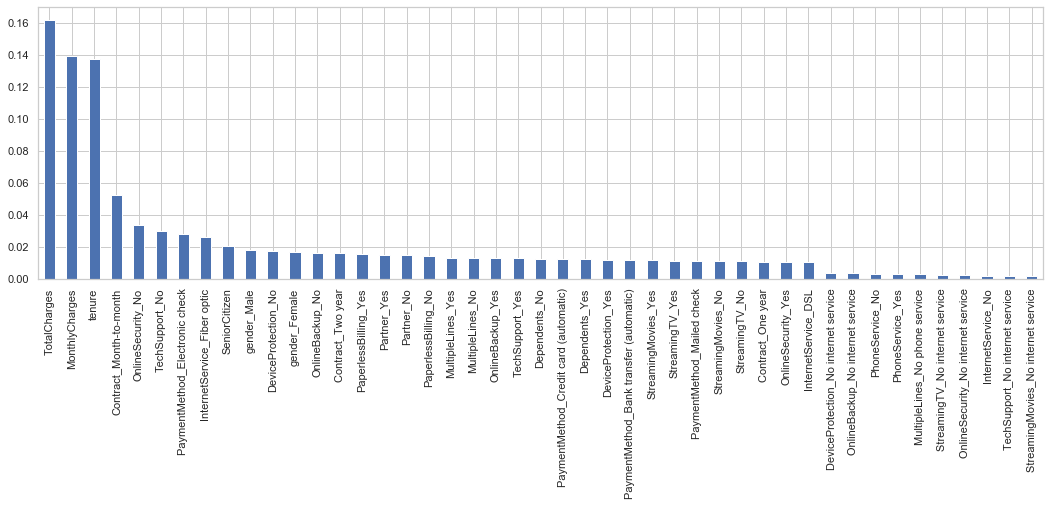

In [49]:
imp_feat.sort_values(ascending=False).plot(kind='bar',figsize=(18,5))

# lets try with statsmodel API

In [50]:
#lets take frst 15 columns

TotalCharges                               0.161777
MonthlyCharges                             0.138982
tenure                                     0.137105
Contract_Month-to-month                    0.052276
OnlineSecurity_No                          0.033889
TechSupport_No                             0.029771
PaymentMethod_Electronic check             0.027809
InternetService_Fiber optic                0.025991
SeniorCitizen                              0.020585
gender_Male                                0.017760
DeviceProtection_No                        0.017159
gender_Female                              0.016959
OnlineBackup_No                            0.016408
Contract_Two year                          0.015922
PaperlessBilling_Yes                       0.015388

# SKLearn logistic 

In [51]:
X=df5[['TotalCharges','MonthlyCharges','tenure','Contract_Month-to-month','OnlineSecurity_No','TechSupport_No','PaymentMethod_Electronic check','InternetService_Fiber optic','SeniorCitizen','gender_Male','DeviceProtection_No','gender_Female','OnlineBackup_No','Contract_Two year','PaperlessBilling_Yes']]
Y=df5[['Target']]

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=250)

In [53]:
from sklearn.linear_model import LogisticRegression 
lgr=LogisticRegression(random_state=0)

In [54]:
Model=lgr.fit(X_train,Y_train)

In [55]:
Model.coef_

array([[ 4.27046490e-04, -4.92742930e-03, -6.75401333e-02,
         1.69762715e-01,  5.18808393e-01,  5.85992596e-01,
         5.24136270e-01,  8.48160053e-01,  4.23980412e-01,
        -5.73847960e-01,  3.17889339e-02, -4.59759783e-01,
         1.76465535e-01, -6.88348269e-01,  2.75016239e-01]])

In [56]:
a=pd.DataFrame(data=Model.coef_,columns=X_train.columns)
x=a.T

In [57]:
x

,0
TotalCharges,0.000427
MonthlyCharges,-0.004927
tenure,-0.067540
Contract_Month-to-month,0.169763
OnlineSecurity_No,0.518808
TechSupport_No,0.585993
PaymentMethod_Electronic check,0.524136
InternetService_Fiber optic,0.848160
SeniorCitizen,0.423980
gender_Male,-0.573848


In [58]:
X_train.columns

Index(['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract_Month-to-month',
       'OnlineSecurity_No', 'TechSupport_No', 'PaymentMethod_Electronic check',
       'InternetService_Fiber optic', 'SeniorCitizen', 'gender_Male',
       'DeviceProtection_No', 'gender_Female', 'OnlineBackup_No',
       'Contract_Two year', 'PaperlessBilling_Yes'],
      dtype='object')

In [59]:
Model.intercept_

array([-1.0387001])

In [60]:
Y_preds=Model.predict(X_test)

In [61]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
metrics.roc_curve(Y_test,Model.predict_proba(X_test)[:,1])

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.80076812e-04, 4.80076812e-04, 9.60153625e-04, 9.60153625e-04,
        9.60153625e-04, 1.92030725e-03, 1.92030725e-03, 2.40038406e-03,
        2.40038406e-03, 3.36053769e-03, 3.36053769e-03, 3.84061450e-03,
        3.84061450e-03, 4.32069131e-03, 4.32069131e-03, 4.80076812e-03,
        4.80076812e-03, 5.28084494e-03, 5.28084494e-03, 5.76092175e-03,
        5.76092175e-03, 6.24099856e-03, 6.24099856e-03, 7.20115218e-03,
        7.20115218e-03, 7.68122900e-03, 7.68122900e-03, 8.64138262e-03,
        8.64138262e-03, 9.12145943e-03, 9.12145943e-03, 9.60153625e-03,
        9.60153625e-03, 1.00816131e-02, 1.00816131e-02, 1.05616899e-02,
        1.05616899e-02, 1.10417667e-02, 1.10417667e-02, 1.15218435e-02,
        1.15218435e-02, 1.20019203e-02, 1.20019203e-02, 1.24819971e-02,
        1.24819971e-02, 1.29620739e-02, 1.29620739e-02, 1.34421507e-02,
        1.34421507e-02, 1.39222276e-02, 1.39222276e-02, 1.440230

In [63]:
fpr,tpr,thresholds=metrics.roc_curve(Y_test,Model.predict_proba(X_test)[:,1])

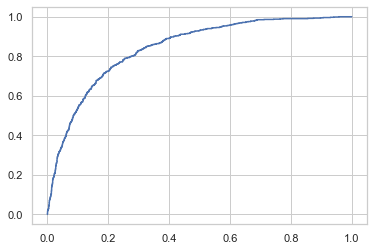

In [64]:
plt.plot(fpr,tpr,"-")

In [65]:
metrics.roc_auc_score(Y_test,Model.predict_proba(X_test)[:,1])

0.8420896731232099

In [66]:
metrics.confusion_matrix(Y_test,Model.predict(X_test))

array([[1892,  191],
       [ 357,  378]], dtype=int64)

# lets check the mulicollinearity

In [67]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [69]:
vif.round(1)

,VIF Factor,features
0,10.4,TotalCharges
1,6.9,MonthlyCharges
2,6.9,tenure
3,2.4,Contract_Month-to-month
4,1.6,OnlineSecurity_No
5,1.7,TechSupport_No
6,1.3,PaymentMethod_Electronic check
7,3.1,InternetService_Fiber optic
8,1.1,SeniorCitizen
9,12.0,gender_Male


In [70]:
#since VIF factor is above 10  shows collinearity is high and we are dropping the columns in the following steps
#to identify the most important columns to be considered.  

In [71]:
x1=df5[['MonthlyCharges','tenure','Contract_Month-to-month','OnlineSecurity_No','TechSupport_No','PaymentMethod_Electronic check','InternetService_Fiber optic','SeniorCitizen','DeviceProtection_No','OnlineBackup_No','Contract_Two year','PaperlessBilling_Yes']]
y1=df5[['Target']]

In [72]:
x1.head()

,MonthlyCharges,tenure,Contract_Month-to-month,OnlineSecurity_No,TechSupport_No,PaymentMethod_Electronic check,InternetService_Fiber optic,SeniorCitizen,DeviceProtection_No,OnlineBackup_No,Contract_Two year,PaperlessBilling_Yes
0,29.85,1,1,1,1,1,0,0,1,0,0,1
1,56.95,34,0,0,1,0,0,0,0,1,0,0
2,53.85,2,1,0,1,0,0,0,1,0,0,1
3,42.30,45,0,0,0,0,0,0,0,1,0,0
4,70.70,2,1,1,1,1,1,0,1,1,0,1


In [73]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif["features"] = x1.columns

In [74]:
vif.round(1)

,VIF Factor,features
0,15.5,MonthlyCharges
1,5.5,tenure
2,3.5,Contract_Month-to-month
3,3.2,OnlineSecurity_No
4,3.3,TechSupport_No
5,1.9,PaymentMethod_Electronic check
6,4.7,InternetService_Fiber optic
7,1.3,SeniorCitizen
8,2.5,DeviceProtection_No
9,2.4,OnlineBackup_No


In [75]:
x2=df5[['tenure','Contract_Month-to-month','OnlineSecurity_No','TechSupport_No','PaymentMethod_Electronic check','InternetService_Fiber optic','SeniorCitizen','DeviceProtection_No','OnlineBackup_No','Contract_Two year','PaperlessBilling_Yes']]
y2=df5[['Target']]

In [76]:
x2.head()

,tenure,Contract_Month-to-month,OnlineSecurity_No,TechSupport_No,PaymentMethod_Electronic check,InternetService_Fiber optic,SeniorCitizen,DeviceProtection_No,OnlineBackup_No,Contract_Two year,PaperlessBilling_Yes
0,1,1,1,1,1,0,0,1,0,0,1
1,34,0,0,1,0,0,0,0,1,0,0
2,2,1,0,1,0,0,0,1,0,0,1
3,45,0,0,0,0,0,0,0,1,0,0
4,2,1,1,1,1,1,0,1,1,0,1


In [77]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])]
vif["features"] = x2.columns

In [78]:
vif.round(1)

,VIF Factor,features
0,3.3,tenure
1,3.2,Contract_Month-to-month
2,3.1,OnlineSecurity_No
3,3.3,TechSupport_No
4,1.9,PaymentMethod_Electronic check
5,2.7,InternetService_Fiber optic
6,1.3,SeniorCitizen
7,2.4,DeviceProtection_No
8,2.3,OnlineBackup_No
9,2.2,Contract_Two year


In [79]:
#again checking the accuracy of our model.

In [80]:
X=df5[['tenure','Contract_Month-to-month','OnlineSecurity_No','TechSupport_No','PaymentMethod_Electronic check','InternetService_Fiber optic','SeniorCitizen','DeviceProtection_No','OnlineBackup_No','Contract_Two year','PaperlessBilling_Yes']]
Y=df5[['Target']]

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=250)

In [82]:
from sklearn.linear_model import LogisticRegression 
lgr=LogisticRegression(random_state=0)

In [83]:
Model=lgr.fit(X_train,Y_train)

In [84]:
Model.coef_

array([[-0.02680644,  0.5682353 ,  0.41957605,  0.44937321,  0.40698824,
         0.89560242,  0.28346116,  0.01954587,  0.20440333, -0.89475873,
         0.33345537]])

In [85]:
x

,0
TotalCharges,0.000427
MonthlyCharges,-0.004927
tenure,-0.067540
Contract_Month-to-month,0.169763
OnlineSecurity_No,0.518808
TechSupport_No,0.585993
PaymentMethod_Electronic check,0.524136
InternetService_Fiber optic,0.848160
SeniorCitizen,0.423980
gender_Male,-0.573848


In [86]:
Model.intercept_

array([-2.15161494])

In [87]:
Y_preds=Model.predict(X_test)

In [88]:
metrics.roc_auc_score(Y_test,Model.predict_proba(X_test)[:,1])

0.8420926123689995

# Conclusion 

In [89]:
##Describe your predictive churn model. How did you select variables to be included in the model?
 I used sklearn Logistic model for predictive churn analysis.Variables are selected on the basis of random forest classifiers 
    showing the most important columns in the data. From that data we selected the 15 important columns to do the modelling.
    
##Demonstrate the performance of the model.
The apllied model showed an accuracy of 84.20926123689995 %.

##What are the key factors that predict customer churn? Do these factors make sense?
The key factors that affect the customer churn are tenure
Contract_Month-to-month
OnlineSecurity_No
TechSupport_No
PaymentMethod_Electronic check
InternetService_Fiber optic
SeniorCitizen
DeviceProtection_No
OnlineBackup_No
Contract_Two year
PaperlessBilling_Yes  etc.

##What offers should be made to which customers to encourage them to remain with company?
The offers to be made to reduce the churn are giving online security,providing technical support, Changing the payment method 
from electronic check to other ways , providing online backups etc.

##Assuming these actions were implemented, how would you determine whether they had worked?
After these actions were implemented , we can again do the analysis and find out the result if we carried out a proper churn 
management.


IndentationError: unexpected indent (<ipython-input-89-2c22403ee4b6>, line 2)